<a href="https://colab.research.google.com/github/SnigdhaPanakanti/Snigdha_DATA690/blob/main/Assignment_05/Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - 05**

## PART - 03: Jupyter Notebooks Tutorial 

### Introduction of Jupyter Notebook:

- What is a Jupyter Notebook?

    - Jupyter Notebook is a free, open sourse ecosystem of multiple tools.
    - It's just like a text document but we can run code on it. It can also display inline graphs, pull data from Databases or show excel spreadsheets live.

- Everything is a cell

  - Jupyter Notebooks are organized as a set of "cells". Each cell can contain different types of content: like Python code (or R, Julia, etc). 
  - The cell containing images or even human readable text are markdown cells, like the one you're currently reading.
  - The cells with code are code cells, as displayed below:

In [1]:
a = 2 + 3
a

5

- The cells can be edited by double clicking on them.
- There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes. Such as:
   - shift + return: Run cell and advance to the next one.
   - ctrl  + return: Run the cell but don't change focus.


### Working with code:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

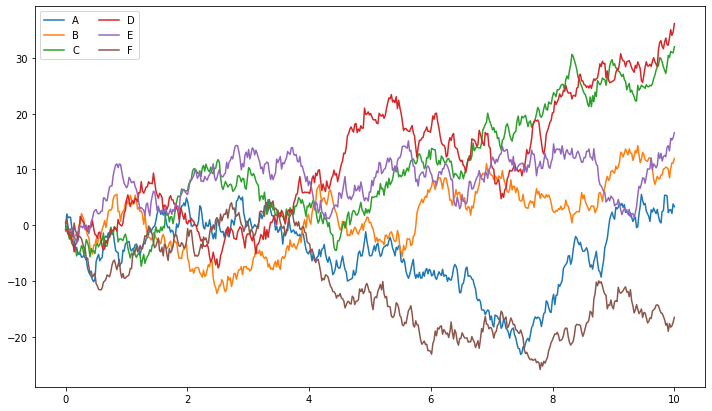

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### Interacting with Data:

In [6]:
import requests
import pandas as pd

Importing data from cryptowatch with a predefined function:

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-26 22:50:34.075765')

In [9]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [10]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

- Bitcoin:

In [18]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 23:00:00,39483.63,39495.45,39090.94,39182.98,26.926009,1.057289e+06
2022-02-27 00:00:00,39159.91,39183.18,38938.99,39146.66,38.993970,1.522280e+06
2022-02-27 01:00:00,39146.66,39285.02,38741.67,38836.10,45.843886,1.785093e+06
2022-02-27 02:00:00,38813.10,38880.04,38233.95,38233.95,60.561839,2.330766e+06
2022-02-27 03:00:00,38246.62,38593.29,38218.11,38572.65,15.473687,5.940543e+05


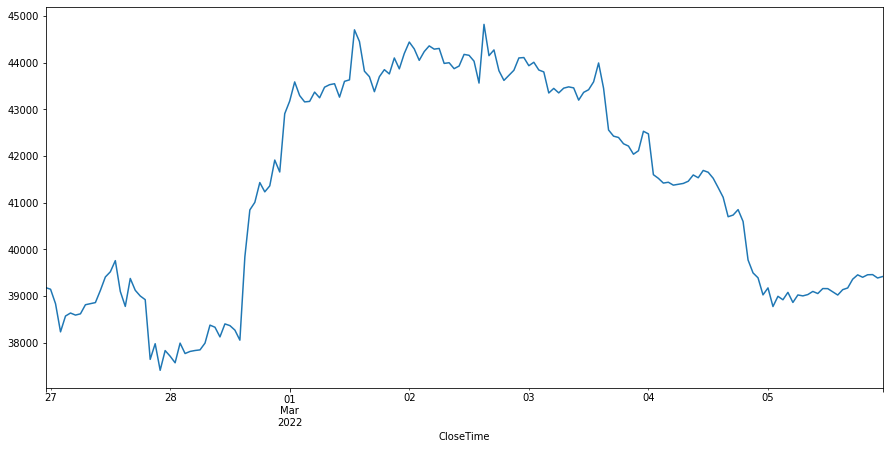

In [13]:
btc['ClosePrice'].plot(figsize=(15, 7))

- Ether:

In [19]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 23:00:00,2828.03,2829.48,2789.42,2796.25,324.217400,9.113860e+05
2022-02-27 00:00:00,2795.61,2796.44,2767.79,2779.62,356.004032,9.899095e+05
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05
2022-02-27 02:00:00,2748.41,2753.56,2683.18,2683.18,700.680329,1.902612e+06
2022-02-27 03:00:00,2681.25,2714.60,2678.04,2712.10,153.019514,4.123667e+05


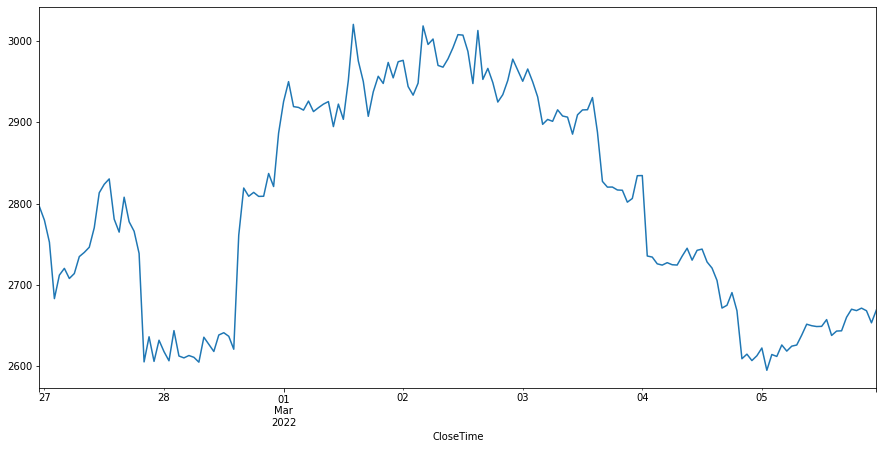

In [20]:
eth['ClosePrice'].plot(figsize=(15, 7))

It is easy to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

- **Bonus: Dynamic plots with Bokeh**

   - Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

In [21]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [22]:
output_notebook()

In [23]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)


### Exporting to Excel:

Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab.

We can create "Excel Writer" from 'pandas' package:

In [24]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [25]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [26]:
eth.to_excel(writer, sheet_name='Ether')

In [27]:
writer.save()

After saving the file, it should then be visible in the left side navigation bar.